In [ ]:
!kaggle datasets download -d yusufberksardoan/traffic-detection-project

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile(file = "/kaggle/working/traffic-detection-project.zip") as file:
    file.extractall("/kaggle/working/traffic-detection-project")

In [2]:
!pip install -q git+https://github.com/ultralytics/ultralytics.git@main

In [3]:
!pip install -q supervision

In [4]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

In [4]:
!mkdir -p /kaggle/working/weights

!wget -P /kaggle/working/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt

!ls -lh /kaggle/working/weights

total 195M
-rw-r--r-- 1 root root 100M May 23 09:38 yolov10l.pt
-rw-r--r-- 1 root root  64M Jun 24 09:57 yolov10m.pt
-rw-r--r-- 1 root root  32M Jun 24 09:57 yolov10s.pt


In [ ]:
from ultralytics import YOLOv10

# Load YOLOv10n model from scratch
model = YOLOv10('/kaggle/working/weights/yolov10l.pt')

# Train the model
model.train(data="/kaggle/working/traffic-detection-project/data.yaml", epochs=100, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.41 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/weights/yolov10l.pt, data=/kaggle/working/traffic-detection-project/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, class

100%|██████████| 755k/755k [00:00<00:00, 4.06MB/s]
2024-06-24 10:06:38,664	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-24 10:06:39,400	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-24 10:06:41.578257: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 10:06:41.578355: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 10:06:41.685315: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1    137728  ultralytics.nn.modules.block.SCDown          [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1    268800  ultralytics

train: Scanning /kaggle/working/traffic-detection-project/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/traffic-detection-project/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 167 weight(decay=0.0), 180 weight(decay=0.0005), 179 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 100 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      1/100      14.8G      1.257      1.026      1.132       1.48      1.449      1.129        185        640: 100%|██████████| 363/363 [05:32<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:27<00:00,  1.53s/it]

                   all        549       6270      0.701      0.565      0.603      0.367



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      2/100      14.9G      1.235      0.851      1.124      1.479      1.005      1.131        284        640: 100%|██████████| 363/363 [05:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.682      0.661      0.686      0.437



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      3/100      14.8G      1.218     0.8164      1.112      1.463     0.9569      1.123        204        640: 100%|██████████| 363/363 [05:20<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.748      0.662      0.718      0.463



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      4/100      14.9G      1.173     0.7658      1.091      1.409     0.8972      1.102        191        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.777      0.706      0.775      0.506



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      5/100      14.9G      1.145     0.7213      1.072      1.379     0.8311      1.083        210        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.815      0.752      0.827      0.558



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      6/100      14.9G      1.117     0.6844       1.06      1.336     0.7751      1.072        257        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270       0.77      0.783      0.829      0.569



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      7/100      14.7G      1.089     0.6531      1.045       1.31     0.7394      1.054        228        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.792      0.783      0.828      0.568



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      8/100      14.8G      1.061     0.6301      1.032      1.274     0.7067       1.04        241        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.852      0.793      0.866      0.605



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      9/100      14.8G       1.03     0.6115      1.019      1.242     0.6775      1.028        287        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.847      0.819      0.882      0.623



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     10/100      14.9G      1.021     0.5933      1.015      1.226     0.6563      1.022        240        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.807      0.812      0.872      0.615



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     11/100      14.8G      1.001     0.5788      1.007      1.207     0.6378      1.017        219        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.846       0.84      0.886      0.633



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     12/100      14.3G      0.995      0.573      1.002      1.195     0.6303       1.01        231        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.879      0.818      0.893      0.632



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     13/100      14.9G     0.9713      0.554     0.9916       1.17     0.6027          1        274        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.858      0.824      0.891      0.638



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     14/100      14.8G     0.9534     0.5376     0.9862       1.15      0.585     0.9951        184        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.874      0.828      0.899      0.653



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     15/100      14.8G     0.9396     0.5317     0.9793      1.135     0.5809     0.9868        236        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.46s/it]

                   all        549       6270      0.872      0.847      0.909      0.659



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     16/100      14.8G     0.9296     0.5194     0.9764      1.122     0.5653     0.9831        235        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.871      0.852      0.911      0.663



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     17/100      14.8G     0.9121      0.509     0.9669      1.103     0.5475     0.9749        257        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.891      0.835      0.916      0.671



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     18/100      14.8G      0.897     0.4984     0.9607      1.087     0.5376     0.9677        269        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.867      0.862      0.916      0.677



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     19/100      14.9G      0.893     0.4967      0.957      1.077     0.5326     0.9653        160        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.889      0.851      0.916      0.687



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     20/100      14.8G     0.8735     0.4801     0.9481       1.06      0.512     0.9566        171        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.46s/it]

                   all        549       6270       0.88      0.859      0.921      0.688



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     21/100      14.8G     0.8577     0.4716     0.9428       1.04      0.505     0.9502        175        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.898      0.862      0.925       0.69



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     22/100      14.7G     0.8547     0.4669     0.9425      1.038      0.498     0.9496        200        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.875      0.882       0.93        0.7



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     23/100      14.4G     0.8419     0.4638     0.9419      1.021     0.4939     0.9494        171        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.902      0.865      0.928      0.703



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     24/100      14.8G     0.8309     0.4551     0.9336      1.012     0.4836     0.9416        130        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.892      0.889      0.934      0.712



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     25/100      14.8G     0.8167     0.4445     0.9306     0.9937     0.4717     0.9393        203        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.898      0.881       0.93      0.708



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     26/100      14.9G     0.8068     0.4398     0.9248     0.9827     0.4613     0.9328        170        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.886      0.896      0.938      0.718



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     27/100        15G     0.8069      0.439     0.9239     0.9803     0.4595     0.9316        190        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270       0.91      0.881      0.937      0.718



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     28/100      14.8G     0.7918     0.4323     0.9233     0.9674     0.4538     0.9297        216        640: 100%|██████████| 363/363 [05:19<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.915      0.881      0.934      0.723



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     29/100      14.9G      0.778     0.4206     0.9194     0.9537     0.4387     0.9264        239        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.917      0.886      0.941      0.728



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     30/100      14.9G     0.7758     0.4196      0.916     0.9511     0.4405     0.9236        131        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.908      0.894      0.937      0.727



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     31/100      14.7G     0.7651     0.4115     0.9113     0.9346     0.4281     0.9186        291        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.895       0.89      0.936      0.727



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     32/100      14.8G     0.7607     0.4089     0.9115     0.9326     0.4248     0.9182        196        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.929      0.892      0.942      0.735



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     33/100      14.8G      0.754     0.4052     0.9053     0.9271      0.421      0.913        131        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.924      0.895      0.943      0.738



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     34/100      14.9G     0.7464     0.4018     0.9023     0.9172     0.4171     0.9098        224        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.919      0.888      0.941      0.741



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     35/100      14.5G       0.74     0.3986     0.9025     0.9099     0.4167     0.9091        216        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.925        0.9      0.941      0.738



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     36/100      14.9G     0.7325     0.3953     0.9001      0.898     0.4078     0.9077        221        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.886      0.907       0.94      0.735



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     37/100      14.8G     0.7192     0.3861     0.8952     0.8829     0.3974     0.9019        281        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.933      0.879      0.944      0.744



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     38/100      14.9G     0.7163     0.3831     0.8953     0.8785     0.3915     0.9013        151        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.914        0.9      0.945      0.751



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     39/100      14.8G     0.7127     0.3814     0.8965     0.8744     0.3886     0.9027        245        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.929      0.889      0.946       0.75



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     40/100      14.9G     0.7033     0.3771     0.8936      0.865     0.3849     0.8998        211        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.921      0.899      0.947      0.758



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     41/100      14.6G     0.6983     0.3743     0.8894     0.8611     0.3833     0.8959        168        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.917      0.911      0.947      0.754



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     42/100      14.8G     0.6891     0.3691     0.8887     0.8505     0.3778      0.896        215        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.924      0.898      0.946      0.756



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     43/100      14.7G     0.6847     0.3651     0.8894     0.8436     0.3717     0.8955        154        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.915      0.896      0.941      0.754



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     44/100      14.9G     0.6789     0.3651     0.8884     0.8389     0.3727     0.8951        154        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.919      0.915      0.947      0.762



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     45/100      14.5G     0.6685      0.355     0.8824     0.8273     0.3603     0.8886        269        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.924      0.899      0.945      0.762



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     46/100      14.9G     0.6628     0.3543     0.8831     0.8192     0.3568     0.8899        198        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.926      0.903      0.945      0.764



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     47/100      14.9G     0.6553     0.3476     0.8792     0.8095     0.3502     0.8859        184        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270       0.93      0.902      0.946      0.767



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     48/100      14.8G     0.6491     0.3456     0.8753     0.8066     0.3491     0.8819        185        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270       0.93      0.904      0.948      0.768



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     49/100        15G     0.6486     0.3435     0.8771     0.8041     0.3475     0.8837        178        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.938      0.892      0.948      0.768



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     50/100      14.9G     0.6399     0.3384      0.874     0.7943      0.338     0.8796        197        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.934        0.9      0.949      0.771



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     51/100      14.9G     0.6306     0.3374      0.874     0.7834     0.3388       0.88        190        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.935      0.894      0.945      0.766



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     52/100      14.9G     0.6271     0.3319     0.8687     0.7827     0.3351     0.8745        264        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.925      0.915      0.951      0.773



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     53/100      14.8G      0.623      0.331     0.8669     0.7752     0.3309     0.8731        204        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.936      0.899      0.949       0.77



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     54/100      14.9G     0.6168     0.3282     0.8663     0.7682     0.3295     0.8722        164        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.931      0.893      0.946       0.77



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     55/100      14.9G     0.6135     0.3259     0.8633     0.7683     0.3286     0.8698        138        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.924      0.912      0.952      0.777



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     56/100      14.8G     0.6076     0.3219     0.8644     0.7612     0.3238     0.8707        188        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270       0.93      0.908      0.951      0.778



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     57/100      14.9G      0.605     0.3216      0.864     0.7558     0.3223     0.8702        296        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270       0.93      0.916      0.949      0.778



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     58/100      14.8G     0.5997     0.3179     0.8593     0.7516     0.3174     0.8659        187        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.921      0.915      0.947      0.778



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     59/100      14.9G      0.592     0.3143     0.8568     0.7423     0.3141     0.8637        198        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.924      0.916      0.948       0.78



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     60/100      14.7G     0.5885     0.3126     0.8584     0.7358     0.3091     0.8647        192        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.936      0.909      0.951      0.785



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     61/100      14.9G     0.5845      0.309     0.8585     0.7326     0.3066     0.8641        191        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.936      0.899      0.949      0.784



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     62/100      14.8G     0.5753     0.3049     0.8556     0.7215      0.303     0.8618        190        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.922      0.923      0.951      0.787



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     63/100      14.9G     0.5731     0.3022     0.8529     0.7186     0.2991     0.8592        220        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.935      0.906      0.949      0.787



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     64/100      14.8G     0.5654     0.2977      0.851     0.7127     0.2954     0.8573        158        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270       0.93      0.913      0.951      0.788



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     65/100      14.8G     0.5577     0.2975     0.8522     0.7011     0.2948     0.8582        210        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.947      0.898      0.951       0.79



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     66/100      14.9G     0.5585     0.2966     0.8526     0.7012     0.2946     0.8584        262        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.944       0.91      0.952      0.789



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     67/100      14.6G     0.5542     0.2943     0.8522      0.694     0.2891      0.858        297        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.937      0.914      0.952       0.79



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     68/100      14.9G     0.5487     0.2916      0.849      0.687     0.2851     0.8544        170        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.933      0.918      0.952      0.793



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     69/100      14.8G     0.5429     0.2893     0.8468      0.687     0.2854     0.8526        187        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.48s/it]

                   all        549       6270      0.929      0.914       0.95      0.793



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     70/100      14.9G     0.5403     0.2882     0.8462     0.6825     0.2842     0.8519        233        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.927      0.913      0.951      0.792



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     71/100        15G     0.5369      0.286     0.8479     0.6766     0.2796     0.8528        203        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.48s/it]

                   all        549       6270      0.945      0.903      0.952      0.797



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     72/100      14.8G     0.5328     0.2855     0.8487     0.6709     0.2796     0.8533        206        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.938      0.909      0.951      0.795



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     73/100      14.8G     0.5306     0.2822     0.8469     0.6684     0.2764     0.8521        200        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270       0.94      0.908      0.951      0.795



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     74/100      14.8G      0.523     0.2787     0.8447     0.6617     0.2732     0.8499        178        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.944      0.906      0.953      0.797



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     75/100      14.9G     0.5223     0.2775     0.8434     0.6613     0.2719      0.848        227        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.932      0.917       0.95      0.796



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     76/100      14.8G     0.5166     0.2733     0.8405     0.6555     0.2675     0.8459        241        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.942      0.908      0.949      0.794



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     77/100      14.9G     0.5119     0.2729     0.8397     0.6498     0.2682     0.8448        185        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.941      0.905      0.951      0.799



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     78/100      14.9G     0.5054     0.2714     0.8403       0.64     0.2653     0.8448        331        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.941      0.913      0.951      0.799



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     79/100      14.8G     0.5032      0.268     0.8382     0.6373     0.2621     0.8434        257        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.947      0.908      0.952      0.801



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     80/100      14.8G        0.5     0.2675     0.8385     0.6339     0.2614     0.8437        183        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.946      0.911      0.952      0.801



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     81/100      14.7G     0.4931     0.2632     0.8371     0.6278      0.257      0.842        206        640: 100%|██████████| 363/363 [05:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.946      0.911       0.95      0.802



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     82/100      14.8G     0.4922     0.2637     0.8364     0.6284     0.2577     0.8413        151        640: 100%|██████████| 363/363 [05:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]

                   all        549       6270      0.937      0.913       0.95      0.801



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     83/100      14.8G     0.4848     0.2592     0.8345     0.6182     0.2507     0.8392        267        640:  44%|████▍     | 160/363 [02:20<02:55,  1.16it/s]

### My training got interupted because of exhausting my free compute resources
# Resuming training

In [16]:
from ultralytics import YOLOv10

# Load YOLOv10n model from scratch
model = YOLOv10('/kaggle/working/runs/detect/train6/weights/last.pt')

# Train the model
model.train(resume = True)

New https://pypi.org/project/ultralytics/8.2.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/runs/detect/train6/weights/last.pt, data=/kaggle/working/traffic-detection-project/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/kaggle/working/runs/detect/train6/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fals

train: Scanning /kaggle/working/traffic-detection-project/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/working/traffic-detection-project/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 167 weight(decay=0.0), 180 weight(decay=0.0005), 179 bias(decay=0.0)
Resuming training /kaggle/working/runs/detect/train6/weights/last.pt from epoch 90 to 100 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 100 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     90/100      15.3G     0.4584      0.245     0.8269     0.5906     0.2402     0.8316        185        640: 100%|██████████| 363/363 [05:25<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:27<00:00,  1.51s/it]

                   all        549       6270      0.936      0.913      0.951      0.806


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     91/100      15.5G     0.4194     0.2211     0.8162     0.5092     0.1915     0.8193        176        640: 100%|██████████| 363/363 [05:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:27<00:00,  1.51s/it]

                   all        549       6270      0.931      0.912       0.95      0.801



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     92/100      15.5G     0.4105      0.217     0.8143      0.504     0.1888     0.8176        122        640: 100%|██████████| 363/363 [05:22<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:27<00:00,  1.51s/it]

                   all        549       6270      0.935      0.918      0.952      0.803



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     93/100      15.4G     0.4061     0.2144     0.8129     0.4991     0.1857     0.8158        167        640: 100%|██████████| 363/363 [05:22<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:27<00:00,  1.51s/it]

                   all        549       6270      0.936      0.919      0.951      0.805



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     94/100      15.5G     0.3994     0.2124     0.8131     0.4924     0.1848     0.8161        105        640: 100%|██████████| 363/363 [05:22<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:27<00:00,  1.51s/it]

                   all        549       6270      0.934      0.923      0.952      0.807



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     95/100      15.5G     0.3955     0.2097     0.8108     0.4882     0.1824     0.8137        175        640: 100%|██████████| 363/363 [05:22<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:27<00:00,  1.51s/it]

                   all        549       6270      0.935      0.923      0.951      0.806



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     96/100      15.5G     0.3893     0.2068     0.8107     0.4813     0.1798     0.8135        193        640: 100%|██████████| 363/363 [05:22<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:27<00:00,  1.51s/it]

                   all        549       6270      0.934      0.919      0.951      0.804



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     97/100      15.4G     0.3852      0.206      0.809     0.4746     0.1776     0.8119        161        640: 100%|██████████| 363/363 [05:22<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:27<00:00,  1.51s/it]

                   all        549       6270      0.933      0.923       0.95      0.805



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     98/100      15.5G     0.3837     0.2033      0.809     0.4745     0.1764     0.8121        131        640: 100%|██████████| 363/363 [05:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:27<00:00,  1.51s/it]

                   all        549       6270      0.934      0.924       0.95      0.804



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     99/100      15.5G     0.3794     0.2023     0.8074     0.4721     0.1764     0.8103        142        640: 100%|██████████| 363/363 [05:22<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:27<00:00,  1.51s/it]

                   all        549       6270      0.938      0.922       0.95      0.806



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


    100/100      15.5G     0.3763     0.2006     0.8071     0.4679     0.1747     0.8104        108        640: 100%|██████████| 363/363 [05:22<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:27<00:00,  1.51s/it]

                   all        549       6270      0.937      0.922       0.95      0.805



11 epochs completed in 1.092 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 52.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 52.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10l summary (fused): 461 layers, 25724078 parameters, 0 gradients, 126.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:32<00:00,  1.81s/it]


                   all        549       6270      0.934      0.922      0.952      0.807
               bicycle        549        250      0.963       0.94       0.96      0.853
                   bus        549        108      0.926      0.944      0.977      0.912
                   car        549       3842      0.941      0.951      0.969      0.824
             motorbike        549       1238      0.934       0.88      0.926       0.67
                person        549        832      0.907      0.897      0.929      0.778
Speed: 0.2ms preprocess, 42.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7980cdaf2350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [18]:

# Export the model to ONNX format
model.export(format="onnx")


Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)
YOLOv10l summary (fused): 461 layers, 25724078 parameters, 0 gradients, 126.4 GFLOPs

PyTorch: starting from 'runs/detect/train6/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (49.8 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 3.5s, saved as 'runs/detect/train6/weights/best.onnx' (93.0 MB)

Export complete (8.0s)
Results saved to /kaggle/working/runs/detect/train6/weights
Predict:         yolo predict task=detect model=runs/detect/train6/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train6/weights/best.onnx imgsz=640 data=/kaggle/working/traffic-detection-project/data.yaml  
Visualize:       https://netron.app


'runs/detect/train6/weights/best.onnx'

# Inference a sample test image


0: 640x640 1 bicycle, 4 cars, 1 motorbike, 55.5ms
Speed: 3.2ms preprocess, 55.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


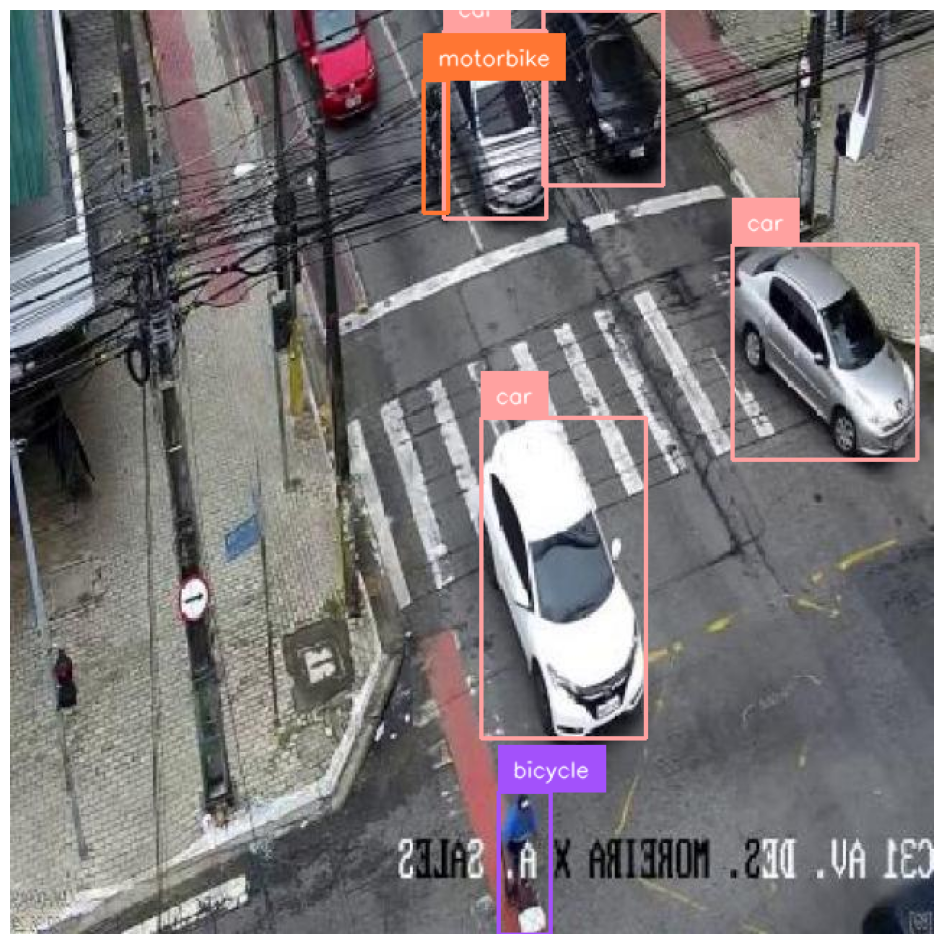

In [7]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

# Load the exported ONNX model
model = YOLOv10("/kaggle/working/runs/detect/train6/weights/best.pt")
image = cv2.imread(f'/kaggle/working/traffic-detection-project/test/images/ant_sales-2185_png_jpg.rf.ef9570c136e91a3119c09d600c86a4a3.jpg')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [8]:
!pip install pytube

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 942.7 kB/s eta 0:00:00a 0:00:01


# Inferencing from youtube video

In [ ]:
from pytube import YouTube

#Creating video lists
video_list = ['https://youtu.be/MNn9qKG2UFI?si=EMvGdrpfiJdGczcJ']

#Looping through the list
for i in video_list:
    try:
        yt = YouTube(i)
        print('Downloading Link: ' + i)
        print('Downloading video: ' + yt.streams[0].title)
    except:
        print("Connection Error")
    #filters out all the files with "mp4" extension
    stream = yt.streams.filter(res="2160").first()
    stream.download("Downloads/")
print('Task Completed!')

In [ ]:
import numpy as np 

def process_frame(frame: np.ndarray, _) -> np.ndarray:
    results = model(frame)[0]
    
    detections = sv.Detections.from_ultralytics(results)
    
    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    annotated_image = bounding_box_annotator.annotate(
        scene=frame, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections)

#     box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)

#     labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
#     frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)

    return annotated_image
VIDEO_PATH = "/kaggle/working/Downloads/4K Road traffic video for object detection and tracking - free download now!.mp4"
sv.process_video(source_path=VIDEO_PATH, target_path=f"result.mp4", callback=process_frame)